## **Задача 3**

Вам предложены данные с информацией о успеваемости студентов:

Независимые переменные:
* Hours Studied: Общее количество часов, потраченных на учебу каждым студентом.
* Previous Scores: Баллы, полученные студентами на предыдущих экзаменах.
* Sleep Hours: Среднее количество часов сна студента в сутки.
* Sample Question Papers Practiced: Количество пробных экзаменационных работ, с которыми студент занимался.
  
Целевая переменная:
* Performance Index: Показатель общей успеваемости каждого студента. Индекс успеваемости отражает академическую успеваемость студента и округляется до ближайшего целого числа. Индекс варьируется от 10 до 100, при этом более высокие значения свидетельствуют о более высокой успеваемости.

Формализация задачи линейной регрессии - 1 балл\
Реализация функции ошибок (потерь) - 2 балла\
Реализация градиентного спуска - 3 балла\
Предобработка данных - 1 балл\
Данные подготовлены корректно, отсюда утствие пропусков, нормализация или стандартизация выполнены (если нужно), возможно стандартизация нужна, плюс скорректировать бинарные признаки.\

Анализ итоговой модели и коэффициентов регрессии - 1 балл\
Предсказание и оценка точности модели - 1 балл\
Сравнение с библиотечными решениями Python (sklearn) - 1 балл\
Проведено сравнение собственных расчетов с результатами использования библиотек. Оценена точность совпадения.

Вывод и интерпретация результатов - 1 балл\

4.1543864176812075 [[-33.73192655]
 [  2.84637899]
 [  1.01641944]
 [  0.59298648]
 [  0.46049641]
 [  0.18919192]]


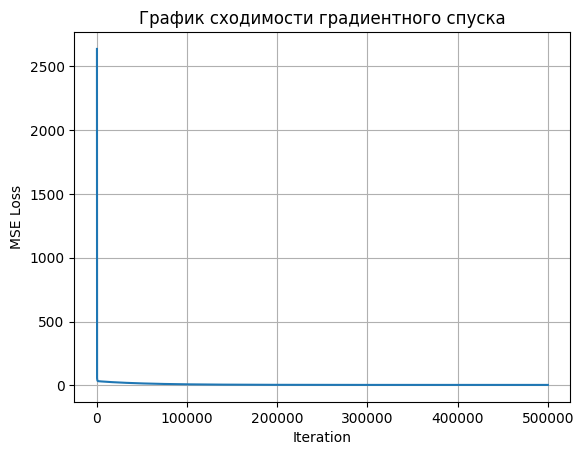

[[0.         2.85298205 1.01843419 0.61289758 0.48055975 0.19380214]]
[-34.07558809]


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# данные, предобработка, моделирование
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor

# метрики
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_log_error,
    max_error,
    r2_score
)

np.random.seed(28)

#Загружаем файл с данными. Преобразуем его в датафрейм.

df = pd.read_csv('C:\IDE\Math analyze\Student_Performance.txt')

#Получаем информацию о датафрейме, в том числе убеждаемся в отсутствии пропусков, так как даный метод указывает эту информацию. 

#df.info()

#Преобразуем столбец данных, содержащий бинарные признаки, в числовой вид.

Extracurricular_Activities = {'Yes': 1, 'No': 0}
df['Extracurricular Activities'] = df['Extracurricular Activities'].map(Extracurricular_Activities)

#Определяем признаки
X = df[['Hours Studied',	'Previous Scores',	'Extracurricular Activities',	'Sleep Hours',	'Sample Question Papers Practiced']]
#print(X)

#Определяем целевую переменную
y = df['Performance Index']
#print(y)

# Прибавляем к массиву признаков столбец свободных коэффициентов, также проверяем размерность массива признаков
n = len(y)
X = np.append(np.ones((n,1)), X.values.reshape(n,5), axis = 1)


# Задаем необходимую размерность массива целевой переменной
y = df['Performance Index'].values.reshape(n,1)
#print(y)

# Задаем начальное приближение, нулевой вектор размерностью, необходимой для умножения на массив признаков

weight = np.zeros((6, 1))
#print(weight)

df.head()


# Составляем функцию ошибок(потерь)

def loss_function(X, y , weight):
    
    # Расчет предсказания модели
    y_pred = np.dot(X, weight)
    
    # Расчет значения функции ошибки MSE
    error = (y_pred - y)**2
    loss = 1/(n)*np.sum(error)
  
    return loss

loss_function(X, y , weight)

# Составляем функцию градиентного спуска
def grad_d(X, y, weight, step, iterations):

    losses = []
    for i in range(iterations):
        y_pred = np.dot(X, weight)
        grad = (2/n) * ((X.transpose())@(y_pred - y))
        
        weight -= step * grad
        losses.append(loss_function(X, y, weight))

    return weight, losses

weight, losses_opt = grad_d(X, y, weight, 0.00018, 500000)

print(losses_opt[-1], weight)

def plot_history(losses):
    """
    Визуализация графика сходимости
    (значение loss в зависимости от номера итерации)
    """
    plt.plot(losses)
    plt.xlabel("Iteration")
    plt.ylabel("MSE Loss")
    plt.title("График сходимости градиентного спуска")
    plt.grid(True)
    plt.show()
    
plot_history(losses_opt)    
    
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
print(model.coef_)
print(model.intercept_)